In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
# Importing libraries
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, f1_score


In [3]:
image_set = 'C:/Users/Bryan/Documents/Semester 4/CompBio/Codes/Datasets'

In [4]:
SIZE_X = SIZE_Y = 224

datagen = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=0.2)

train_set = datagen.flow_from_directory(
    image_set,
    class_mode="categorical",
    target_size=(SIZE_X, SIZE_Y),
    color_mode="rgb",
    batch_size=32,
    shuffle=True, 
    subset='training',
    seed=42
)

validate_set = datagen.flow_from_directory(
    image_set,
    class_mode="categorical",
    target_size=(SIZE_X, SIZE_Y),
    color_mode="rgb",
    batch_size=32,
    shuffle=False,
    subset='validation',
    seed=42
)

Found 878 images belonging to 3 classes.
Found 219 images belonging to 3 classes.


In [5]:
IMAGE_SIZE = [224, 224]

In [6]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [7]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [8]:
flatten = Flatten()(inception.output)
dense = Dense(256, activation='relu')(flatten)
dense = Dense(128, activation='relu')(dense)
prediction = Dense(3, activation='softmax')(dense)

In [9]:
# creating a model
model = Model(inputs=inception.input, outputs=prediction)

In [10]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 111, 111,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 111, 111,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 109, 109,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 109, 109,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 54, 54,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 54, 54,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 52, 52,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 34,943,523 (133.30 MB)

 Trainable params: 13,140,739 (50.13 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [11]:
# COMPILING THE MODEL
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
# executing the model
history = model.fit(train_set, validation_data=validate_set, epochs=30, verbose=1)

Epoch 1/30


c:\Users\Bryan\anaconda3\envs\bersihenv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


28/28 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.5505 - loss: 324.9441 - val_accuracy: 0.6210 - val_loss: 110.2475
Epoch 2/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 20s 713ms/step - accuracy: 0.7548 - loss: 52.6177 - val_accuracy: 0.4977 - val_loss: 89.0858
Epoch 3/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 20s 699ms/step - accuracy: 0.8505 - loss: 14.4649 - val_accuracy: 0.6804 - val_loss: 68.7242
Epoch 4/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 19s 689ms/step - accuracy: 0.8205 - loss: 31.4109 - val_accuracy: 0.6484 - val_loss: 72.6710
Epoch 5/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 19s 688ms/step - accuracy: 0.9210 - loss: 7.0921 - val_accuracy: 0.5571 - val_loss: 81.5478
Epoch 6/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 19s 685ms/step - accuracy: 0.9537 - loss: 3.6592 - val_accuracy: 0.5890 - val_loss: 90.9908
Epoch 7/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 653ms/step - accuracy: 0.9375 - loss: 3.4449 - val_accuracy: 0.5799 - val_loss: 95.5198
Epoch 8/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 643ms/step - accuracy: 0.8454 - loss: 24.8038 - val_accu

In [13]:
# output dari cell ini di clear karena filenya terlalu besar.

from tensorflow.keras.utils import plot_model

# Plot the model architecture
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

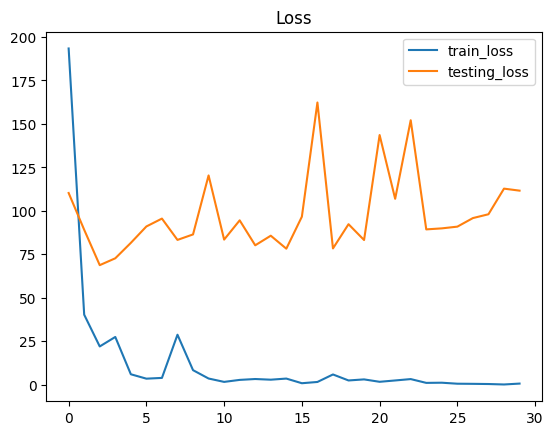

In [14]:
# plotting the loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='testing_loss')
plt.title('Loss')
plt.legend()
plt.show()

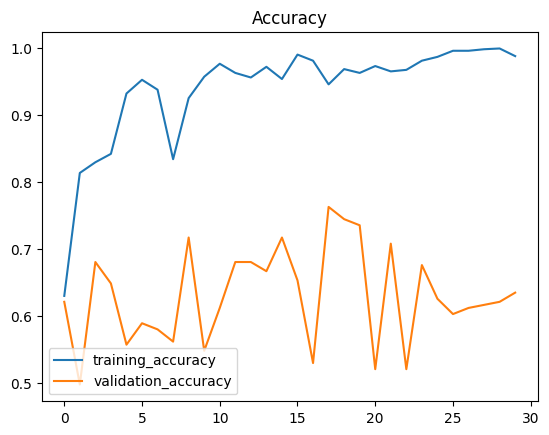

In [15]:
# Both Validation and Training accuracy is shown here
plt.plot(history.history['accuracy'], label='training_accuracy')
plt.plot(history.history['val_accuracy'], label='validation_accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

In [16]:
# CHECKING THE CONFUSION MATRIX
Y_pred = model.predict(validate_set)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
conf_matrix = confusion_matrix(validate_set.classes, y_pred)
print(conf_matrix)
print('Classification Report')
target_names = ['aca', 'n', 'scc']
print(classification_report(validate_set.classes, y_pred, target_names=target_names))

7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 686ms/step
Confusion Matrix
[[ 4  0 20]
 [ 0 60 52]
 [ 1  7 75]]
Classification Report
              precision    recall  f1-score   support

         aca       0.80      0.17      0.28        24
           n       0.90      0.54      0.67       112
         scc       0.51      0.90      0.65        83

    accuracy                           0.63       219
   macro avg       0.74      0.54      0.53       219
weighted avg       0.74      0.63      0.62       219



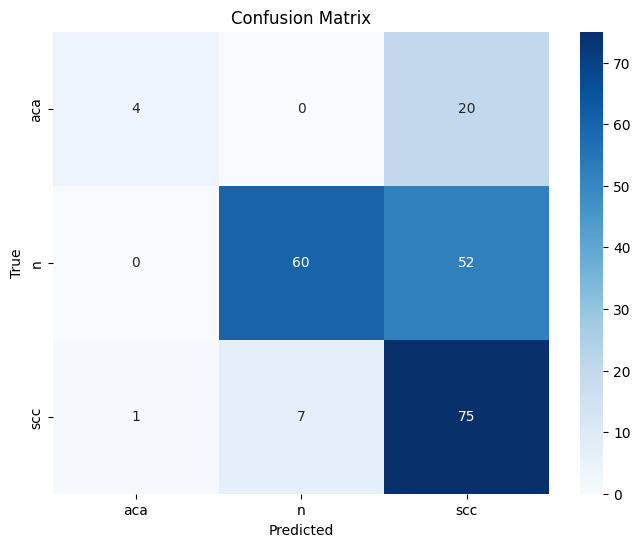

In [17]:
# PLOTTING THE HEATMAP FOR CONFUSION MATRIX
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()